In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime

data = pd.read_csv('cneos_fireball_data.csv', delimiter=',', encoding = 'utf-8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peak Brightness Date/Time (UT)       719 non-null    object 
 1   Latitude (deg.)                      539 non-null    object 
 2   Longitude (deg.)                     539 non-null    object 
 3   Altitude (km)                        307 non-null    float64
 4   Velocity (km/s)                      157 non-null    float64
 5   vx                                   157 non-null    float64
 6   vy                                   157 non-null    float64
 7   vz                                   157 non-null    float64
 8   Total Radiated Energy (J)            719 non-null    float64
 9   Calculated Total Impact Energy (kt)  719 non-null    float64
dtypes: float64(7), object(3)
memory usage: 56.3+ KB


In [4]:
data.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,307.000000,157.000000,157.000000,157.000000,157.000000,7.190000e+02,719.000000
mean,36.511726,17.950318,0.310828,-2.388535,-1.031847,8.812462e+11,1.387638
std,10.649462,6.057382,10.825425,11.415896,10.419010,1.405769e+13,16.598496
min,15.200000,9.800000,-35.400000,-43.500000,-28.700000,2.000000e+10,0.073000
25%,29.600000,13.700000,-7.300000,-11.200000,-9.100000,3.300000e+10,0.110000
50%,35.200000,16.900000,0.100000,-2.300000,0.300000,6.800000e+10,0.220000
75%,40.700000,19.800000,9.100000,4.800000,6.700000,1.510000e+11,0.440000
max,74.000000,49.000000,21.500000,25.800000,23.700000,3.750000e+14,440.000000


In [5]:
data.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


#### 1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.

In [6]:
# Находим максимальную энергию
max_energy = data['Total Radiated Energy (J)'].max()
# Определяем местоположение (если считать, что местоположение - это широта, долгота и высота)
latitude = data[data['Total Radiated Energy (J)'] == max_energy]['Latitude (deg.)']
longitude = data[data['Total Radiated Energy (J)'] == max_energy]['Longitude (deg.)']
altitude = data[data['Total Radiated Energy (J)'] == max_energy]['Altitude (km)']

print('Ширина:', list(latitude)[0])
print('Долгота:', list(longitude)[0])
print('Высота:', list(altitude)[0])

Ширина: 54.8N
Долгота: 61.1E
Высота: 23.3


#### 2. Определите метеорит с максимальной и минимальной скоростью.

In [7]:
# Находим max и min скорости
max_velocity = data['Velocity (km/s)'].max()
min_velocity = data['Velocity (km/s)'].min()

In [8]:
# Находим метеорит с max скоростью
data[data['Velocity (km/s)'] == max_velocity]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [8]:
# Находим метеорит с min скоростью
data[data['Velocity (km/s)'] == min_velocity]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


#### 3. Определите место максимальной концентрации метеоритов.

In [29]:
# Удаляем строки, в которых не указаны координаты
data.dropna(subset=['Latitude (deg.)'], inplace=True)

# Определяем полушария для каждой координаты (N или S, E или W)
latitude = list(data['Latitude (deg.)'].apply(lambda x: x[-1]))
longitude = list(data['Longitude (deg.)'].apply(lambda x: x[-1]))

# Всего можно выделить 4 области: N-E, N-W, S-E, S-W
# Создаем словарь для подсчета числа точек в каждой области
coordinates = {'N-E':0, 'N-W':0, 'S-E':0, 'S-W':0}

# Считаем точки
for x,y in zip(latitude, longitude):
    coordinates[x+'-'+y] +=1

# Итого получаем:
print(coordinates)

{'N-E': 138, 'N-W': 126, 'S-E': 149, 'S-W': 126}


In [32]:
# Находим область с наибольшим числом точек
max_value = max(coordinates.values())
for k in coordinates:
    if coordinates[k] == max_value:
        print('Наибольшая концентрация метеоритов в области:', k)

Наибольшая концентрация метеоритов в области: S-E


#### 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.

In [33]:
# Заново читаем csv, т.к. в предыдущем пункте удалились часть данных
data = pd.read_csv('cneos_fireball_data.csv', delimiter=',', encoding = 'utf-8')

Время года с наибольшим числом метеоритов: autumn 

autumn    182
spring    180
winter    179
summer    178
Name: Seasons, dtype: int64


<AxesSubplot:xlabel='Время года', ylabel='Частота появления метеоритов'>

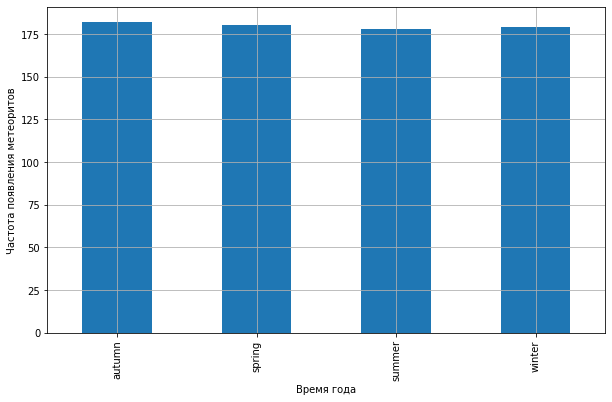

In [34]:
# Словарь соответствия номера месяца со временем года
seasons_dict = {1:'winter', 2:'winter', 3:'spring', 4:'spring', 5:'spring', 6:'summer',
                7:'summer', 8:'summer', 9:'autumn', 10:'autumn', 11:'autumn', 12:'winter'}

# Определяем время года, в которое появился каждый метеорит
seasons = data['Peak Brightness Date/Time (UT)'].apply(lambda x: seasons_dict[datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month])

# Добавляем новый столбец в таблицу с данными
data.insert(0, 'Seasons', seasons)

# Определяем время года с наибольшим числом метеоритов
print('Время года с наибольшим числом метеоритов:', data['Seasons'].value_counts().index[0], '\n')
print(data['Seasons'].value_counts())

# Строим график
data.groupby('Seasons').count()['Peak Brightness Date/Time (UT)'].plot(figsize=(10,6), kind='bar',
                                                                    xlabel='Время года', 
                                                                    ylabel='Частота появления метеоритов', 
                                                                    grid=True)

#### 5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.

In [10]:
print('Размер набора данных до удаления:', data.shape)

# Удаляем строки, в которых не указана скорость
data.dropna(subset=['Velocity (km/s)'], inplace=True)

print('Размер набора данных после удаления:', data.shape)

Размер набора данных до удаления: (719, 11)
Размер набора данных после удаления: (157, 11)


#### 6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.

In [11]:
# Заново читаем csv, т.к. в предыдущем пункте удалились часть данных
data = pd.read_csv('cneos_fireball_data.csv', delimiter=',', encoding = 'utf-8')

<AxesSubplot:xlabel='Время суток', ylabel='Частота появления метеоритов'>

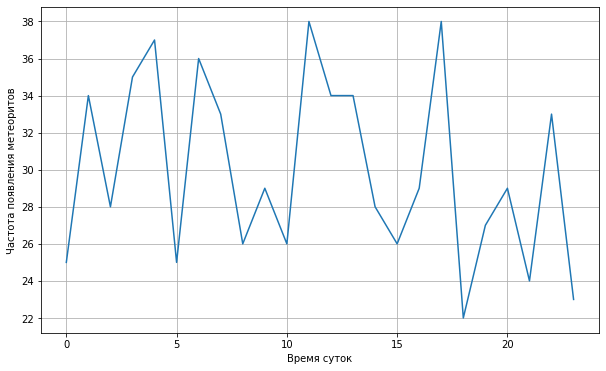

In [12]:
# Определяем время суток (будем считать, что время суток - это час появления метеорита) для каждой даты
# Например, '2017-07-31 22:01:35' - час появления '22'
time = data['Peak Brightness Date/Time (UT)'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)

# Добавляем новый столбец в таблицу с данными
data.insert(0, 'Time', time)

# Подсчитываем кол-во метеоритов за каждый час суток и отрисовываем график
data.groupby('Time').count()['Peak Brightness Date/Time (UT)'].plot(figsize=(10,6), 
                                                                    xlabel='Время суток', 
                                                                    ylabel='Частота появления метеоритов', 
                                                                    grid=True)

#### 7. Заполните строки в которых для метеоритов не указана скорость.

In [13]:
# Данные ДО записи
data['Velocity (km/s)']

0       NaN
1      17.2
2      13.7
3      15.2
4      24.3
       ... 
714     NaN
715     NaN
716     NaN
717     NaN
718     NaN
Name: Velocity (km/s), Length: 719, dtype: float64

In [14]:
# Определяем индексы пустых строк
nan_indexes = data[data['Velocity (km/s)'].isnull()].index

# Создаем массив нулей для пустых строк
dummy_data = np.zeros((len(nan_indexes)))

# Заполняем нулями пустые строки
data.loc[nan_indexes, 'Velocity (km/s)'] = pd.Series(dummy_data, index=nan_indexes)

In [15]:
# Данные ПОСЛЕ записи
data['Velocity (km/s)']

0       0.0
1      17.2
2      13.7
3      15.2
4      24.3
       ... 
714     0.0
715     0.0
716     0.0
717     0.0
718     0.0
Name: Velocity (km/s), Length: 719, dtype: float64

#### 8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).

Наибольшее число метеоритов за месяц: 65


<AxesSubplot:xlabel='Месяц', ylabel='Частота появления метеоритов'>

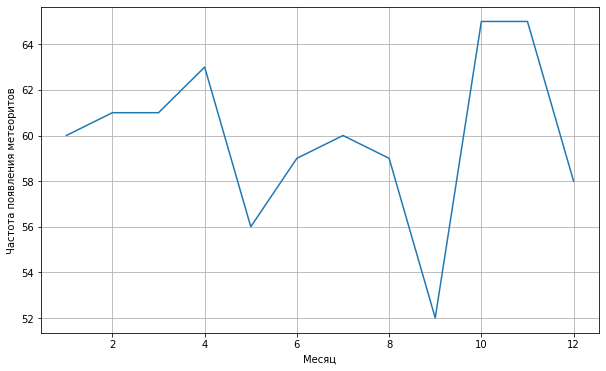

In [16]:
# Определяем месяц года для каждой даты появления метеорита
month = data['Peak Brightness Date/Time (UT)'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)

# Добавляем новый столбец с месяцами в таблицу с данными
data.insert(0, 'Month', month)

# Определим наибольшее число метеоритов за месяц
print('Наибольшее число метеоритов за месяц:', data.groupby('Month').count()['Peak Brightness Date/Time (UT)'].max())

# Подсчитываем кол-во метеоритов за каждый месяц и отрисовываем график
data.groupby('Month').count()['Peak Brightness Date/Time (UT)'].plot(figsize=(10,6), kind='line',
                                                                    xlabel='Месяц', 
                                                                    ylabel='Частота появления метеоритов', 
                                                                    grid=True)

In [17]:
# По графику видно, что пик (65 появлений) приходится на 10 и 11 месяцы.

# Подсчитаем количество метеоритов за каждый месяц и отсортируем от большего к меньшему
meteorites_per_month = data['Month'].value_counts()

# Выводим месяцы с наибольшим числом метеоритов - берем 0 и 1 элементы, т.к. ранее мы выяснили, что таких месяцев два
print('Месяцы с наибольшим числом метеоритов:', meteorites_per_month.index[0], meteorites_per_month.index[1])

Месяцы с наибольшим числом метеоритов: 11 10


#### 9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [18]:
# Удаляем строки, в которых отсутствуют значения признака Altitude
data.dropna(subset=['Altitude (km)'], inplace=True)

# Список столбцов для анализа
col = ['Altitude (km)', 'Total Radiated Energy (J)']

# Вычисление коэффициентов корреляции Пирсона и Спирмена и значение p-value
coef_corr_pearson, p_value_pearson = stats.pearsonr(data['Altitude (km)'], data['Total Radiated Energy (J)']) 
coef_corr_spearman, p_value_spearman = stats.spearmanr(data['Altitude (km)'], data['Total Radiated Energy (J)'])

print(f'Коэффициент корреляции Пирсона: {coef_corr_pearson}, p-value: {p_value_pearson}')
print(f'Коэффициент корреляции Спирмена: {coef_corr_spearman}, p-value: {p_value_spearman}')

Коэффициент корреляции Пирсона: -0.08578656525823591, p-value: 0.13368269878711372
Коэффициент корреляции Спирмена: -0.12671041939219074, p-value: 0.026415728610676672


<AxesSubplot:>

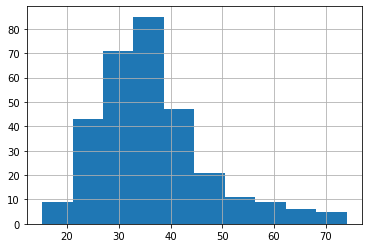

In [19]:
# Гистограмма для признака Altitude
data['Altitude (km)'].hist()

<AxesSubplot:>

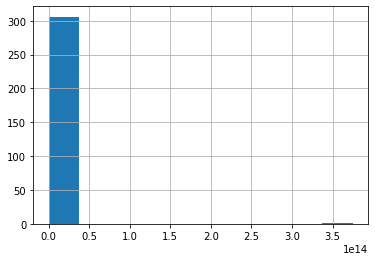

In [20]:
# Гистограмма для признака Total Radiated Energy
data['Total Radiated Energy (J)'].hist()